In [ ]:
# ========================================
# 1. IMPORT LIBRARIES
# ========================================

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, roc_auc_score, RocCurveDisplay

In [ ]:
# ========================================
# 2. LOAD DATASET
# ========================================

# Assuming CSV downloaded from Kaggle
df = pd.read_csv("/content/diabetes.csv")
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [ ]:
# Shape and info
print("Shape:", df.shape)
print("\nInfo:")
print(df.info())

Shape: (768, 9)

Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB
None


In [ ]:
# Missing values
print("\nMissing values:")
print(df.isnull().sum())


Missing values:
Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64


In [ ]:
# Basic statistics
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


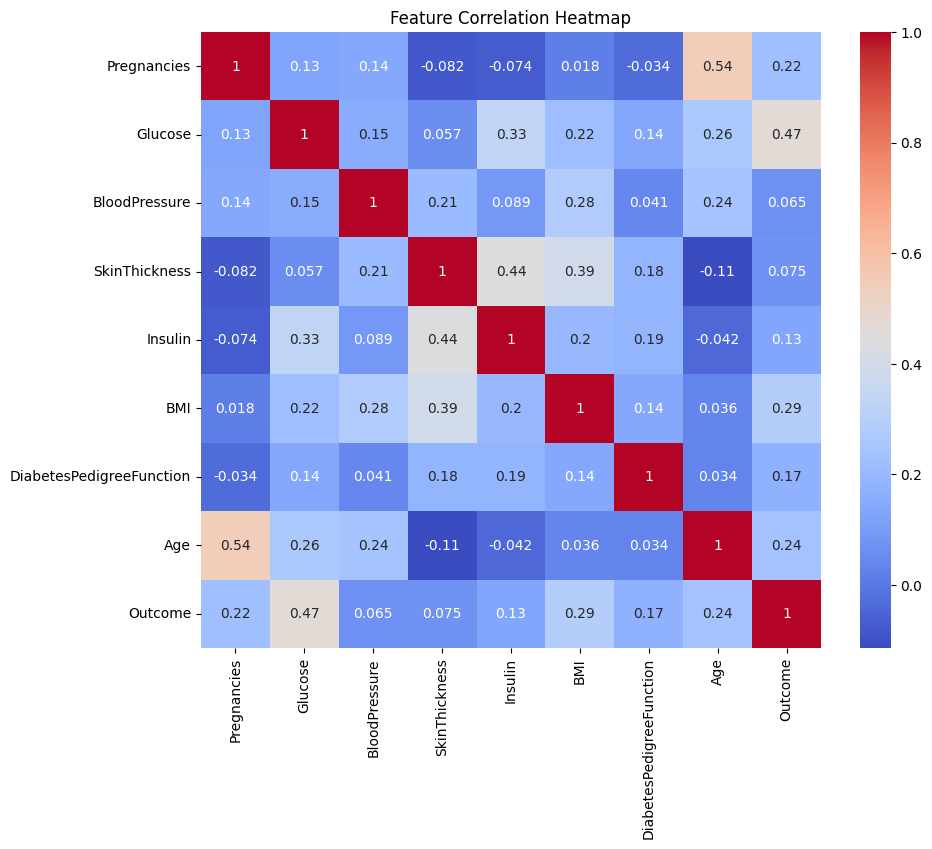

In [ ]:
# Correlation heatmap
plt.figure(figsize=(10,8))
sns.heatmap(df.corr(), annot=True, cmap="coolwarm")
plt.title("Feature Correlation Heatmap")
plt.show()

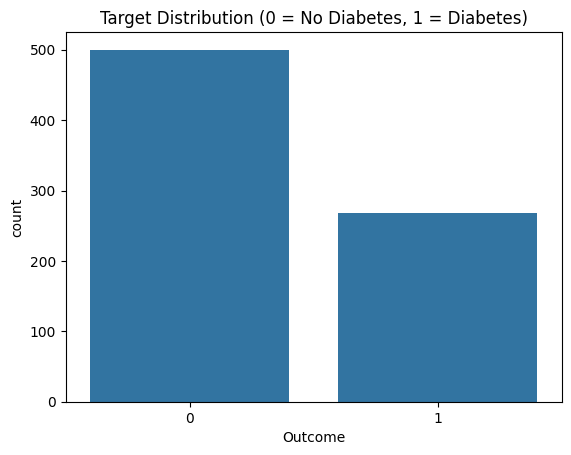

In [ ]:
# Distribution of target
sns.countplot(x='Outcome', data=df)
plt.title("Target Distribution (0 = No Diabetes, 1 = Diabetes)")
plt.show()

In [ ]:
# PRE PROCESSING
# Separate features & target
X = df.drop("Outcome", axis=1)
y = df["Outcome"]

# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# Feature Scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [ ]:
# MODELING - Logisttic Regression
lr = LogisticRegression()
lr.fit(X_train_scaled, y_train)

y_pred_lr = lr.predict(X_test_scaled)

print("=== Logistic Regression Performance ===")
print("Accuracy:", accuracy_score(y_test, y_pred_lr))
print("Precision:", precision_score(y_test, y_pred_lr))
print("Recall:", recall_score(y_test, y_pred_lr))
print("F1 Score:", f1_score(y_test, y_pred_lr))
print("ROC-AUC:", roc_auc_score(y_test, y_pred_lr))

print()

print("=== Logistic Regression Performance - Percentage ===")
print(f"Accuracy: {accuracy_score(y_test, y_pred_lr):.3%}")
print(f"Precision: {precision_score(y_test, y_pred_lr):.3%}")
print(f"Recall: {recall_score(y_test, y_pred_lr):.3%}")
print(f"F1 Score: {f1_score(y_test, y_pred_lr):.3%}")
print(f"ROC-AUC: {roc_auc_score(y_test, y_pred_lr):.3%}")

=== Logistic Regression Performance ===
Accuracy: 0.7142857142857143
Precision: 0.6086956521739131
Recall: 0.5185185185185185
F1 Score: 0.56
ROC-AUC: 0.6692592592592593

=== Logistic Regression Performance - Percentage ===
Accuracy: 71.429%
Precision: 60.870%
Recall: 51.852%
F1 Score: 56.000%
ROC-AUC: 66.926%


In [ ]:
# MODELING - Random Forest Classifier

rf = RandomForestClassifier(n_estimators=200, random_state=42)
rf.fit(X_train, y_train)  # RandomForest does not require scaling

y_pred_rf = rf.predict(X_test)

print("=== Random Forest Performance ===")
print("Accuracy:", accuracy_score(y_test, y_pred_rf))
print("Precision:", precision_score(y_test, y_pred_rf))
print("Recall:", recall_score(y_test, y_pred_rf))
print("F1 Score:", f1_score(y_test, y_pred_rf))
print("ROC-AUC:", roc_auc_score(y_test, y_pred_rf))

print()

print("=== Random Forest Performance - Percentage ===")
print(f"Accuracy: {accuracy_score(y_test, y_pred_lr):.3%}")
print(f"Precision: {precision_score(y_test, y_pred_lr):.3%}")
print(f"Recall: {recall_score(y_test, y_pred_lr):.3%}")
print(f"F1 Score: {f1_score(y_test, y_pred_lr):.3%}")
print(f"ROC-AUC: {roc_auc_score(y_test, y_pred_lr):.3%}")

=== Random Forest Performance ===
Accuracy: 0.7467532467532467
Precision: 0.6530612244897959
Recall: 0.5925925925925926
F1 Score: 0.6213592233009708
ROC-AUC: 0.7112962962962963

=== Random Forest Performance - Percentage ===
Accuracy: 71.429%
Precision: 60.870%
Recall: 51.852%
F1 Score: 56.000%
ROC-AUC: 66.926%


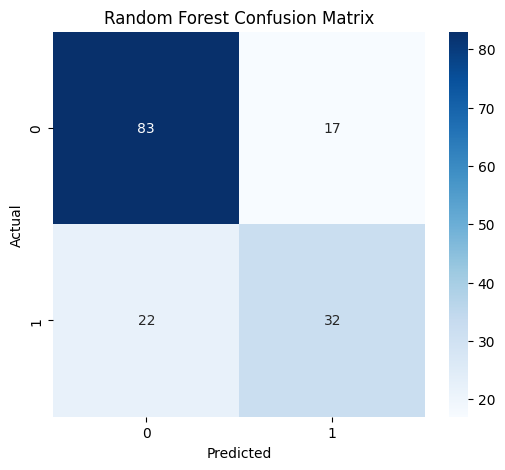

In [ ]:
# Confusion Matrix
cm = confusion_matrix(y_test, y_pred_rf)
plt.figure(figsize=(6,5))
sns.heatmap(cm, annot=True, fmt='d', cmap="Blues")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Random Forest Confusion Matrix")
plt.show()

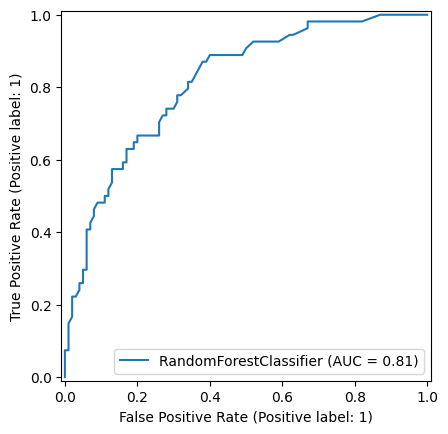

In [ ]:
# ROC Curve
RocCurveDisplay.from_estimator(rf, X_test, y_test)
plt.show()

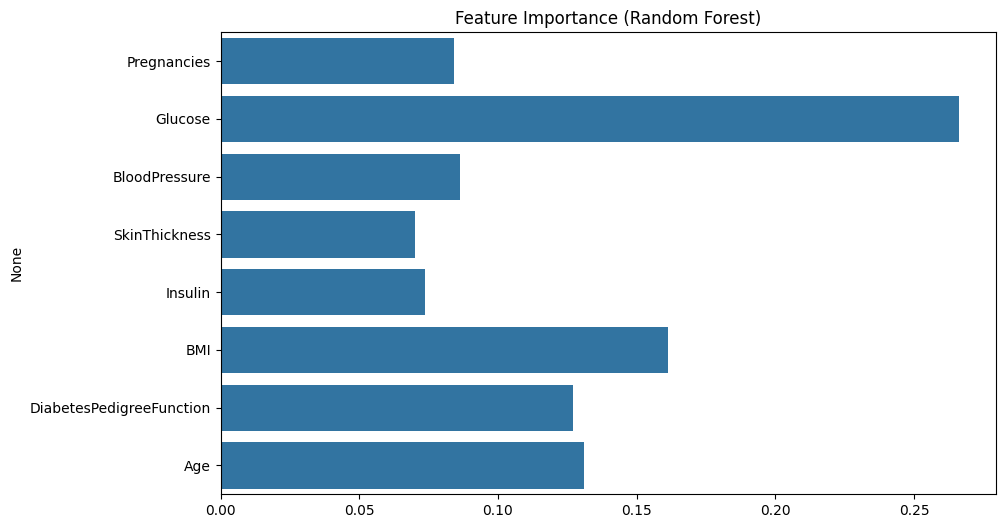

In [ ]:
# Feature Importance
importances = rf.feature_importances_
features = X.columns

plt.figure(figsize=(10,6))
sns.barplot(x=importances, y=features)
plt.title("Feature Importance (Random Forest)")
plt.show()